## Script to plot Figure 9 in Biastoch et al. (2021): "Regional Imprints of Changes in the Atlantic Meridional Overturning Circulation in the Eddy-rich Ocean Model VIKING20X"

In [1]:
import xarray as xr
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import cm
from matplotlib import ticker
from matplotlib.offsetbox import AnchoredText

In [2]:
### SETTINGS TO BE ADJUSTED TO THE WORKING ENVIRONMENT

# INPUT PATHS
datapath = '/gxfs_work1/fs1/work-geomar1/smomw210/Biastoch2021_Figure09_publish/' 

# OUTPUT PATHS
figspath = '/gxfs_work1/fs1/work-geomar1/smomw210/Biastoch2021_Figure09_publish/'
figname = figspath + 'Figure09' + '.png'

In [3]:
### EMPLOYED PARAMETERS

# INTERCOMPARISON PERIOD (in years)
tcomp = slice(1980,2009,1)

# REGION OF INTEREST: SPG
latmin = 47
latmax = 66
lonmin = -65
lonmax = -28

# CRITICAL DEEP CONVECTION DEPTH (in meters)
zcrit = 1000

#DEPTH FOR WHICH EKE WAS CALCULATED (in meters)
depthEKE = 112 

deg = r'$^{\circ}$'

### FIGURE SETTINGS
fs1 = 'x-small'
xticks=[-60, -50, -40, -30]
yticks=[50, 60]
xticklabels=['60' + deg + 'W', '50' + deg + 'W', '40' + deg + 'W', '30' + deg + 'W']
yticklabels=['50' + deg + 'N', '60' + deg + 'N']
lw1 = 1.0 # contour DCarea
lw2 = 0.5 # contour pDCarea
lw3 = 1.2 # timeseries MLDV VIKING20X
lw4 = 0.4 # timeseries MLDV ORCA025
nctic = 3
colm_MLD = cm.viridis
levs_MLD = np.arange(0, 1500, 75)
norm_MLD = colors.BoundaryNorm(boundaries=levs_MLD, ncolors=colm_MLD.N)
colm_EKE = cm.Spectral_r
levs_EKE = np.arange(0, 750, 25)
norm_EKE = colors.BoundaryNorm(boundaries=levs_EKE, ncolors=colm_EKE.N)
colLAND = 'grey'
colLANDEKE = 'lightgrey'
col_DCarea = 'salmon'
col_pDCarea = 'grey'
colVC = (0,0,0,1) #black
colVJ = (0,0,1,1) #blue
colVJO= (1,0,0,1) #red
colOJ = (0,0.6,0,1) #green
colOJO= (1,0,0,1) #red

In [4]:
### LOAD DATA

# LONG-TERM MEAN (1980-2009) EKE
# (based on 5-day mean velocities referenced to annual mean values
# as described in Rieck et al. 2015)
EKE_VC = xr.open_dataset(datapath + 'EKE_VC.nc')
EKE_VJl = xr.open_dataset(datapath + 'EKE_VJl.nc')
EKE_OJ = xr.open_dataset(datapath + 'EKE_OJ.nc')

# LONG-TERM MEAN (1980-2009) ANNUAL MAXIMUM MLD 
# (based on monthly mean values)
MLD_VC = xr.open_dataset(datapath + 'MLD_VC.nc')
MLD_VJl = xr.open_dataset(datapath + 'MLD_VJl.nc')
MLD_OJ = xr.open_dataset(datapath + 'MLD_OJ.nc')

# LONG-TERM MAXIMUM (1980-2009) MLD
# (based on monthly mean values)
pDCarea_VC = xr.open_dataset(datapath + 'pDCarea_VC.nc')
pDCarea_VJl = xr.open_dataset(datapath + 'pDCarea_VJl.nc')
pDCarea_OJ = xr.open_dataset(datapath + 'pDCarea_OJ.nc')

# TIMESERIES OF SPATIALLY INTEGRATED ANNUAL MAXIMUM MLD VOLUME
# (integration over SPG region as defined above)
mldV_VC = xr.open_dataset(datapath + 'MLDV_VC.nc')
mldV_VJs = xr.open_dataset(datapath + 'MLDV_VJs.nc')
mldV_VJl = xr.open_dataset(datapath + 'MLDV_VJl.nc')
mldV_VJO = xr.open_dataset(datapath + 'MLDV_VJO.nc')
mldV_OJ = xr.open_dataset(datapath + 'MLDV_OJ.nc')
mldV_OJO = xr.open_dataset(datapath + 'MLDV_OJO.nc')

# BATHYMETRY
bathy_V = xr.open_dataset(datapath + 'bathy_V.nc')
bathy_O = xr.open_dataset(datapath + 'bathy_O.nc')

/gxfs_home/geomar/smomw210/miniconda3/envs/py3_std/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  if __name__ == '__main__':
/gxfs_home/geomar/smomw210/miniconda3/envs/py3_std/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
/gxfs_home/geomar/smomw210/miniconda3/envs/py3_std/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorr

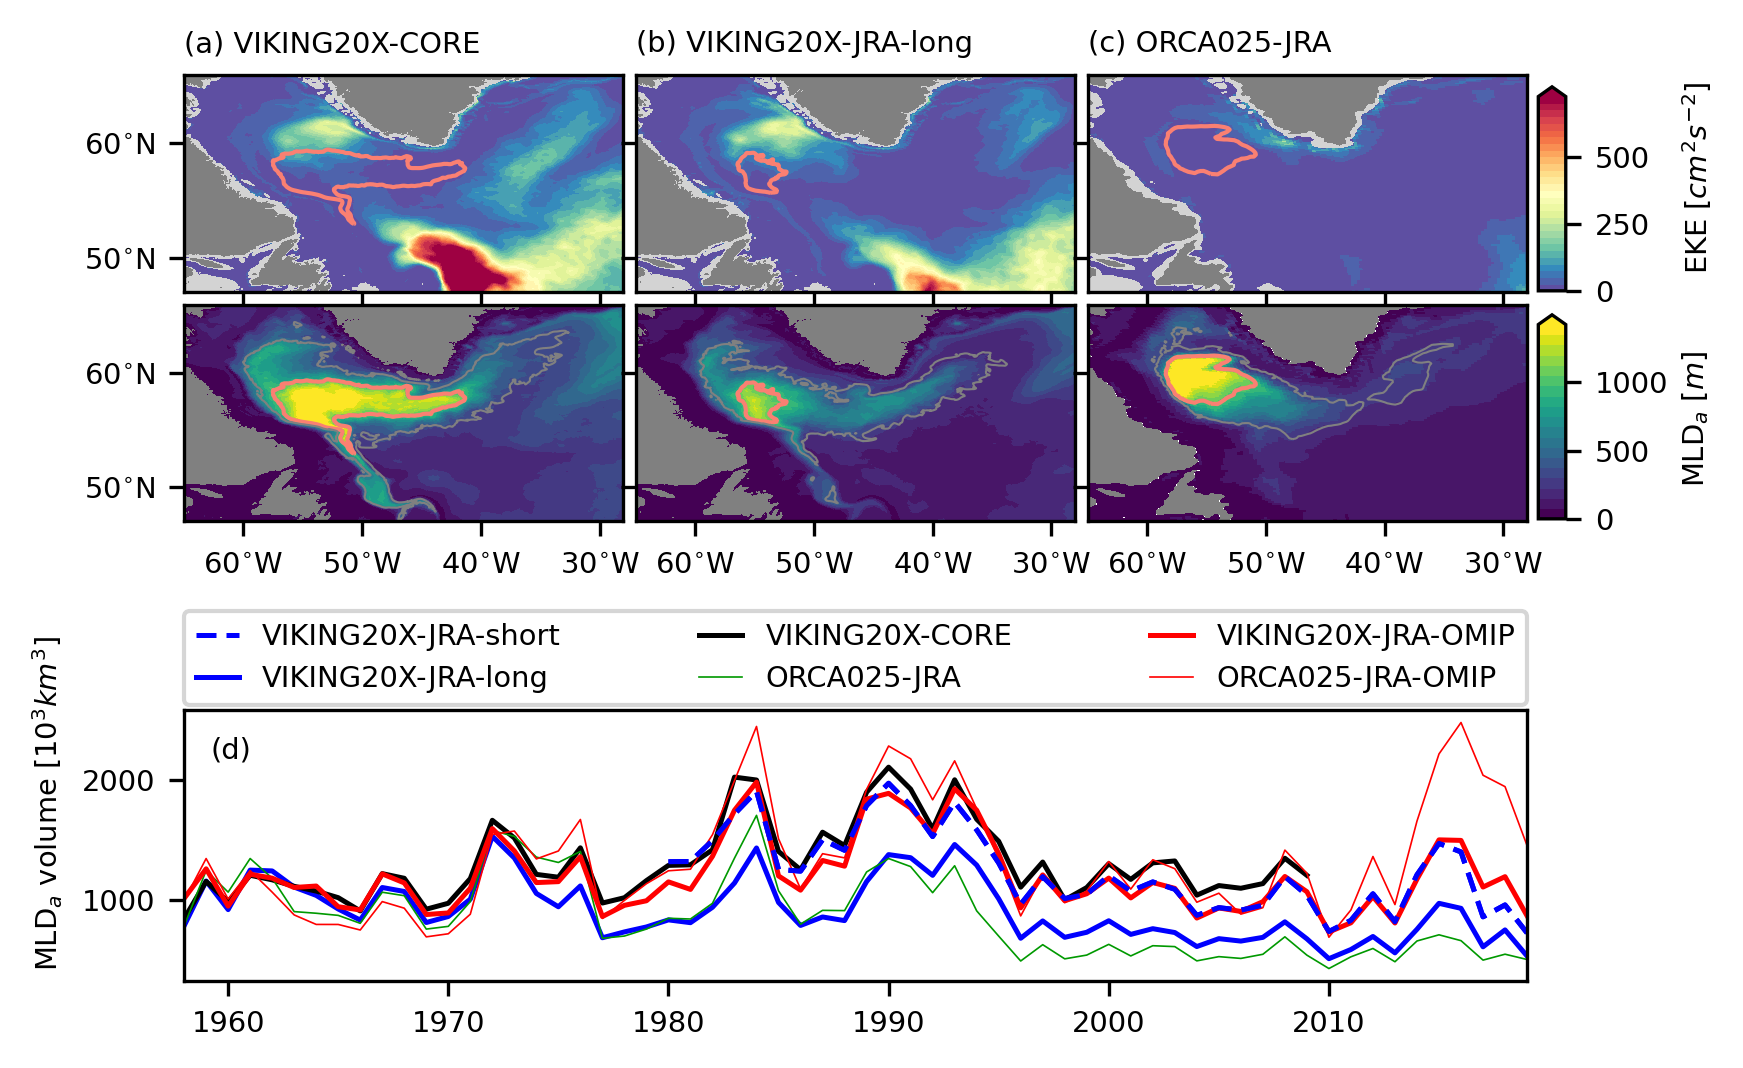

In [5]:
### PLOTTING

fig = plt.figure(figsize=(6.1,4),dpi=300)

# SUBPLOT (a)
ax2 = plt.subplot2grid((12,19),(0,0), colspan=6, rowspan=3)
map = ax2.pcolormesh(EKE_VC.nav_lon, EKE_VC.nav_lat, EKE_VC.voeke,
                     cmap=colm_EKE, norm=norm_EKE,
                     shading='auto')
cbaxes = fig.add_axes([0.865, 0.7, 0.015, 0.17]) 
cbar = plt.colorbar(map, cax = cbaxes, orientation='vertical', extend='max')
cbar.ax.tick_params(labelsize=fs1)
tick_locator = ticker.MaxNLocator(nbins=nctic)
cbar.locator = tick_locator; cbar.update_ticks()
ax2.contourf(bathy_V.nav_lon,bathy_V.nav_lat,
             bathy_V.Bathymetry,[-1,depthEKE],colors=colLANDEKE)
ax2.contourf(bathy_V.nav_lon,bathy_V.nav_lat,
             bathy_V.Bathymetry,[-1,0],colors=colLAND)
cont1 = ax2.contour(MLD_VC.nav_lon, MLD_VC.nav_lat, MLD_VC.somxl010, [zcrit],
                    colors=col_DCarea, linewidths=lw1)
ax2.set_xlim(lonmin,lonmax)
ax2.set_ylim(latmin,latmax)
ax2.set_xticks(xticks); ax2.set_xticklabels([])
ax2.set_yticks(yticks); ax2.set_yticklabels(yticklabels)
ax2.tick_params(axis='both', labelsize=fs1)
ax2.text(61, 57, 'EKE [$cm^2s^{-2}$]' ,
         fontsize=fs1,
         horizontalalignment='left', verticalalignment='center',
         rotation=90)
ax2.text(lonmin, latmax+2, '(a) VIKING20X-CORE',
         fontsize=fs1,
         horizontalalignment='left')

ax2 = plt.subplot2grid((12,19),(3,0), colspan=6, rowspan=3)
map = ax2.pcolormesh(MLD_VC.nav_lon, MLD_VC.nav_lat, MLD_VC.somxl010,
                     cmap=colm_MLD, norm=norm_MLD,
                     shading='auto')
cbaxes = fig.add_axes([0.865, 0.51, 0.015, 0.17]) 
cbar = plt.colorbar(map, cax = cbaxes, orientation='vertical', extend='max')
cbar.ax.tick_params(labelsize=fs1)
tick_locator = ticker.MaxNLocator(nbins=nctic)
cbar.locator = tick_locator; cbar.update_ticks()
ax2.contourf(bathy_V.nav_lon,bathy_V.nav_lat,
             bathy_V.Bathymetry,[-1,0],colors=colLAND)
cont1 = ax2.contour(MLD_VC.nav_lon, MLD_VC.nav_lat, MLD_VC.somxl010,[zcrit],
                    colors=col_DCarea, linewidths=lw1)
cont2 = ax2.contour(pDCarea_VC.nav_lon, pDCarea_VC.nav_lat, pDCarea_VC.somxl010,[zcrit],
                    colors=col_pDCarea, linewidths=lw2)
ax2.set_xlim(lonmin,lonmax)
ax2.set_ylim(latmin,latmax)
ax2.set_xticks(xticks); ax2.set_xticklabels(xticklabels)
ax2.set_yticks(yticks); ax2.set_yticklabels(yticklabels)
ax2.tick_params(axis='both', labelsize=fs1)
ax2.text(61, 56, 'MLD$_a$ [$m$]' ,
         fontsize=fs1,
         horizontalalignment='left',
         verticalalignment='center',
         rotation=90)


# SUBPLOT (b)
ax2 = plt.subplot2grid((12,19),(0,6), colspan=6, rowspan=3)
map = ax2.pcolormesh(EKE_VJl.nav_lon, EKE_VJl.nav_lat, EKE_VJl.voeke,
                     cmap=colm_EKE, norm=norm_EKE,
                     shading='auto')
ax2.contourf(bathy_V.nav_lon,bathy_V.nav_lat,
             bathy_V.Bathymetry,[-1,depthEKE],colors=colLANDEKE)
ax2.contourf(bathy_V.nav_lon,bathy_V.nav_lat,
             bathy_V.Bathymetry,[-1,0],colors=colLAND)
cont1 = ax2.contour(MLD_VJl.nav_lon, MLD_VJl.nav_lat, MLD_VJl.somxl010, [zcrit],
                    colors=col_DCarea, linewidths=lw1)
ax2.set_xlim(lonmin,lonmax)
ax2.set_ylim(latmin,latmax)
ax2.set_xticks(xticks); ax2.set_xticklabels([])
ax2.set_yticks(yticks); ax2.set_yticklabels([])
ax2.tick_params(axis='both', labelsize=fs1)
ax2.text(lonmin, latmax+2, '(b) VIKING20X-JRA-long',
         fontsize=fs1,
         horizontalalignment='left')

ax2 = plt.subplot2grid((12,19),(3,6), colspan=6, rowspan=3)
map = ax2.pcolormesh(MLD_VJl.nav_lon, MLD_VJl.nav_lat, MLD_VJl.somxl010,
                     cmap=colm_MLD, norm=norm_MLD,
                     shading='auto')
ax2.contourf(bathy_V.nav_lon,bathy_V.nav_lat,
             bathy_V.Bathymetry,[-1,0],colors=colLAND)
cont1 = ax2.contour(MLD_VJl.nav_lon, MLD_VJl.nav_lat, MLD_VJl.somxl010,[zcrit],
                    colors=col_DCarea, linewidths=lw1)
cont2 = ax2.contour(pDCarea_VJl.nav_lon, pDCarea_VJl.nav_lat, pDCarea_VJl.somxl010,[zcrit],
                    colors=col_pDCarea, linewidths=lw2)
ax2.set_xlim(lonmin,lonmax)
ax2.set_ylim(latmin,latmax)
ax2.set_xticks(xticks); ax2.set_xticklabels(xticklabels)
ax2.set_yticks(yticks); ax2.set_yticklabels([])
ax2.tick_params(axis='both', labelsize=fs1)


# SUBPLOT (c)
ax2 = plt.subplot2grid((12,19),(0,12), colspan=6, rowspan=3)
map = ax2.pcolormesh(EKE_OJ.nav_lon, EKE_OJ.nav_lat, EKE_OJ.voeke,
                     cmap=colm_EKE, norm=norm_EKE,
                     shading='auto')
ax2.contourf(bathy_O.nav_lon,bathy_O.nav_lat,
             bathy_O.Bathymetry,[-1,depthEKE],colors=colLANDEKE)
ax2.contourf(bathy_O.nav_lon,bathy_O.nav_lat,
             bathy_O.Bathymetry,[-1,0],colors=colLAND)
cont1 = ax2.contour(MLD_OJ.nav_lon, MLD_OJ.nav_lat, MLD_OJ.somxl010, [zcrit],
                    colors=col_DCarea, linewidths=lw1)
ax2.set_xlim(lonmin,lonmax)
ax2.set_ylim(latmin,latmax)
ax2.set_xticks(xticks); ax2.set_xticklabels([])
ax2.set_yticks(yticks); ax2.set_yticklabels([])
ax2.tick_params(axis='both', labelsize=fs1)
ax2.text(lonmin, latmax+2, '(c) ORCA025-JRA',
         fontsize=fs1,
         horizontalalignment='left')

ax2 = plt.subplot2grid((12,19),(3,12), colspan=6, rowspan=3)
map = ax2.pcolormesh(MLD_OJ.nav_lon, MLD_OJ.nav_lat, MLD_OJ.somxl010,
                     cmap=colm_MLD, norm=norm_MLD,
                     shading='auto')
ax2.contourf(bathy_O.nav_lon,bathy_O.nav_lat,
             bathy_O.Bathymetry,[-1,0],colors=colLAND)
cont1 = ax2.contour(MLD_OJ.nav_lon, MLD_OJ.nav_lat, MLD_OJ.somxl010,[zcrit],
                    colors=col_DCarea, linewidths=lw1)
cont2 = ax2.contour(pDCarea_OJ.nav_lon, pDCarea_OJ.nav_lat, pDCarea_OJ.somxl010,[zcrit],
                    colors=col_pDCarea, linewidths=lw2)
ax2.set_xlim(lonmin,lonmax)
ax2.set_ylim(latmin,latmax)
ax2.set_xticks(xticks); ax2.set_xticklabels(xticklabels)
ax2.set_yticks(yticks); ax2.set_yticklabels([])
ax2.tick_params(axis='both', labelsize=fs1)


# SUBPLOT (g)
ax2 = plt.subplot2grid((13,19),(9,0), colspan=18, rowspan=5)
plt.plot(mldV_VJs.year,mldV_VJs.mldv/(10**3),
         color=colVJ, linestyle='--', dashes=[4, 2],
         linewidth=lw3, label='VIKING20X-JRA-short')
plt.plot(mldV_VJl.year,mldV_VJl.mldv/(10**3),
         color=colVJ, linewidth=lw3, label='VIKING20X-JRA-long')
plt.plot(mldV_VC.year,mldV_VC.mldv/(10**3),
         color=colVC, linewidth=lw3, label='VIKING20X-CORE')
plt.plot(mldV_OJ.year,mldV_OJ.mldv/(10**3),
         color=colOJ, linewidth=lw4, label='ORCA025-JRA')
plt.plot(mldV_VJO.year,mldV_VJO.mldv/(10**3),
         color=colVJO, linewidth=lw3, label='VIKING20X-JRA-OMIP')
plt.plot(mldV_OJO.year,mldV_OJO.mldv/(10**3),
         color=colOJO, linewidth=lw4, label='ORCA025-JRA-OMIP')
plt.plot(mldV_VJs.year,mldV_VJs.mldv/(10**3),
         color=colVJ, linestyle='--', dashes=[4, 2],
         linewidth=lw3)
ax2.set_xlim([1958, 2019])
ax2.tick_params(axis='both', labelsize=fs1)
ax2.text(1951, 1800, 'MLD$_a$ volume [$10^{3}km^{3}$]',
         fontsize=fs1,
         horizontalalignment='left',
         verticalalignment='center',
         rotation=90)
ax2.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', fontsize=fs1,
           ncol=3, borderaxespad=0., mode='expand', handlelength=1.5)
at = AnchoredText('(d)', prop=dict(size=fs1), frameon=False, loc='upper left')
ax2.add_artist(at)


# SAVING
plt.savefig(figname, format='PNG', dpi=300)